In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
 
# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
 
# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
!pip install tensorflow

     ------------------------------------ 376.9/376.9 MB 490.0 kB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 127.8/127.8 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 240.7/

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
 
# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
 
# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\DP\\train (2).csv")
df.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [7]:
df = df.drop_duplicates()
print(df.isnull().sum())
df = df.dropna()

id       0
label    0
tweet    0
dtype: int64


In [10]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [11]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    tokens = nltk.word_tokenize(text)
    
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)


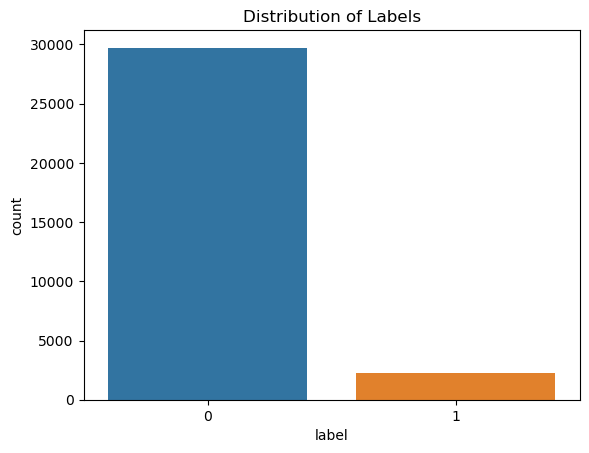

In [12]:
sb.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()


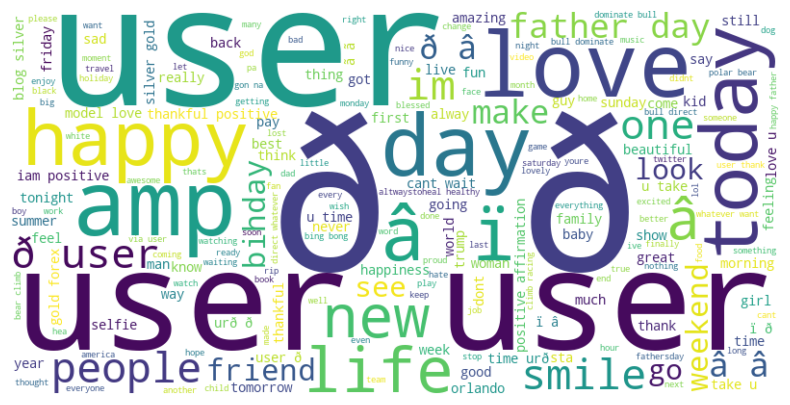

In [13]:
all_words = ' '.join([text for text in df['cleaned_tweet']])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_tweet'])
sequences = tokenizer.texts_to_sequences(df['cleaned_tweet'])
max_length = max([len(x) for x in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['label'], test_size=0.2, random_state=42)


In [15]:
# Define the model
model = keras.Sequential([
    layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length),
    layers.SpatialDropout1D(0.2),
    layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=1)


C:\Users\Admin\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 29s 72ms/step - accuracy: 0.9139 - loss: 0.2756 - val_accuracy: 0.9316 - val_loss: 0.1990
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 26s 71ms/step - accuracy: 0.9330 - loss: 0.1809 - val_accuracy: 0.9585 - val_loss: 0.1325
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 29s 82ms/step - accuracy: 0.9742 - loss: 0.0814 - val_accuracy: 0.9550 - val_loss: 0.1323
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step - accuracy: 0.9868 - loss: 0.0393 - val_accuracy: 0.9609 - val_loss: 0.1623
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.9932 - loss: 0.0228 - val_accuracy: 0.9566 - val_loss: 0.1551


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9552 - loss: 0.1444
Test Accuracy: 95.46%


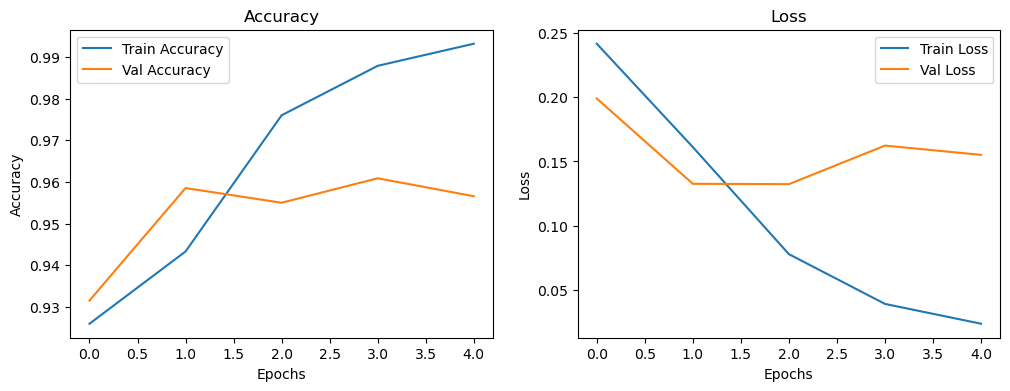

In [16]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
